# User Evaluation Analysis

## No. of Participants = 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


N = 5

## User Evaluation Data

In [2]:
systems = ['System A', 'System B', 'System C']
tasks = ['Task 1', 'Task 2', 'Task 3', 'Task 4']

# 2-D array structure:
# [System A, System B, System C] for each Task

# Total Time Taken per system for each task
total_time = [
    [73, 101, 81],
    [580, 424, 503],
    [299, 800, 309],
    [298, 564, 419],
]

# Total Scores for each system per task
max_scores = [5, 15, 10, 15]  # Max scores per task
scores = [
    [5, 5, 3],     # Max: 5
    [10, 13, 10],  # Max: 15
    [9, 6, 8],     # Max: 10
    [15, 10, 13],  # Max: 15
]
# Convert to percentage correct and incorrect
percentage_correct = [[(s / max_scores[i]) * 100
                       for s in scores[i]]
                      for i in range(len(tasks))]
percentage_incorrect = [[100 - p
                         for p in percentage_correct[i]]
                        for i in range(len(tasks))]

# User difficulty ratings
# (5 - most easy, 25 - most difficult)
user_ratings = [
    [5, 7, 7],
    [12, 13, 10],
    [11, 20, 10],
    [7, 11, 10],
]

# System preferences
system_preferences = [
    [9, 2, 9],     # Task Preference Count
    [15, 16, 20],  # Aesthetic Rating (25 = best)
    [15, 13, 18],  # Cognitive Load Rating (25 = lightest)
]

# Performance 1: Total Time Taken

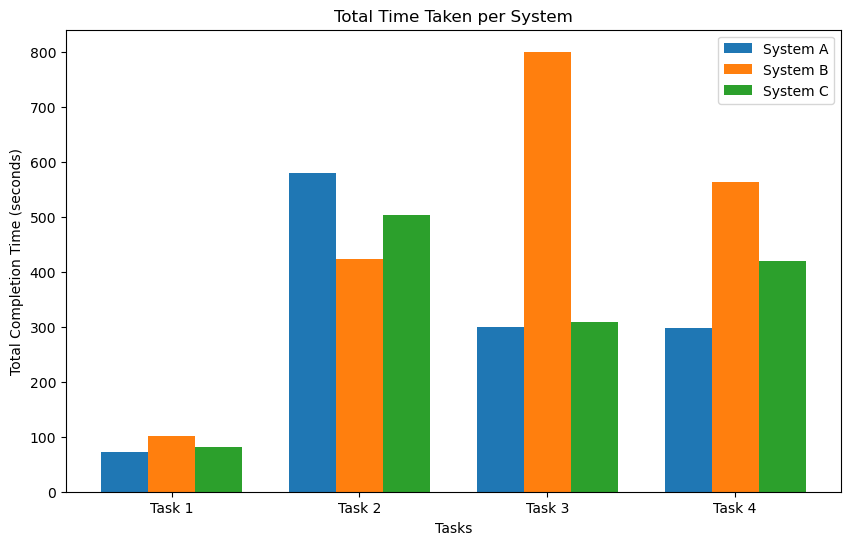

In [3]:
x = np.arange(len(tasks))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
for i, system in enumerate(systems):
    ax.bar(x + (i - 1) * width, [total_time[j][i] for j in range(len(tasks))], width, label=system)

ax.set_xlabel("Tasks")
ax.set_ylabel("Total Completion Time (seconds)")
ax.set_title("Total Time Taken per System")
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend()
plt.show()

# Performance 2: Total Score

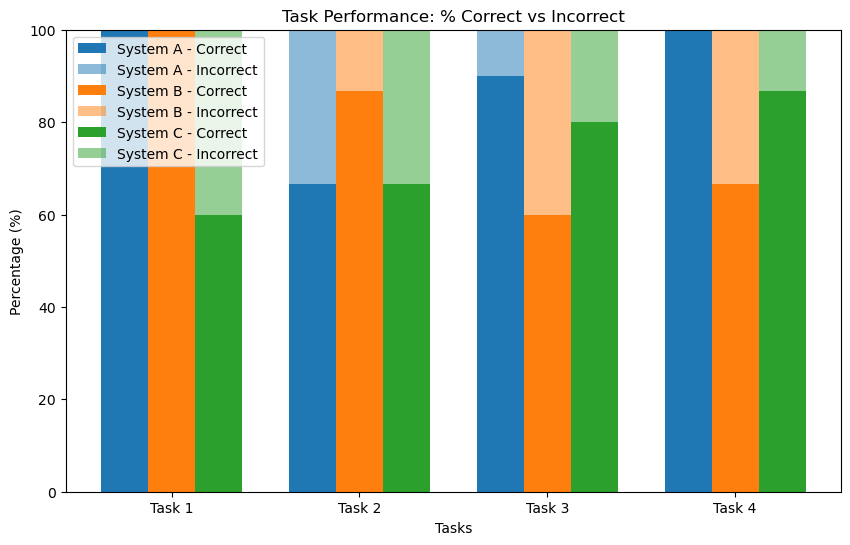

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
for i, system in enumerate(systems):
    bottom_vals = np.zeros(len(tasks))
    ax.bar(x + (i - 1) * width, [percentage_correct[j][i] for j in range(len(tasks))], width, label=f'{system} - Correct', color=f'C{i}')
    ax.bar(x + (i - 1) * width, [percentage_incorrect[j][i] for j in range(len(tasks))], width, bottom=[percentage_correct[j][i] for j in range(len(tasks))], color=f'C{i}', alpha=0.5, label=f'{system} - Incorrect')

ax.set_xlabel("Tasks")
ax.set_ylabel("Percentage (%)")
ax.set_title("Task Performance: % Correct vs Incorrect")
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend()
plt.show()

# Perception: User Difficulty Rating

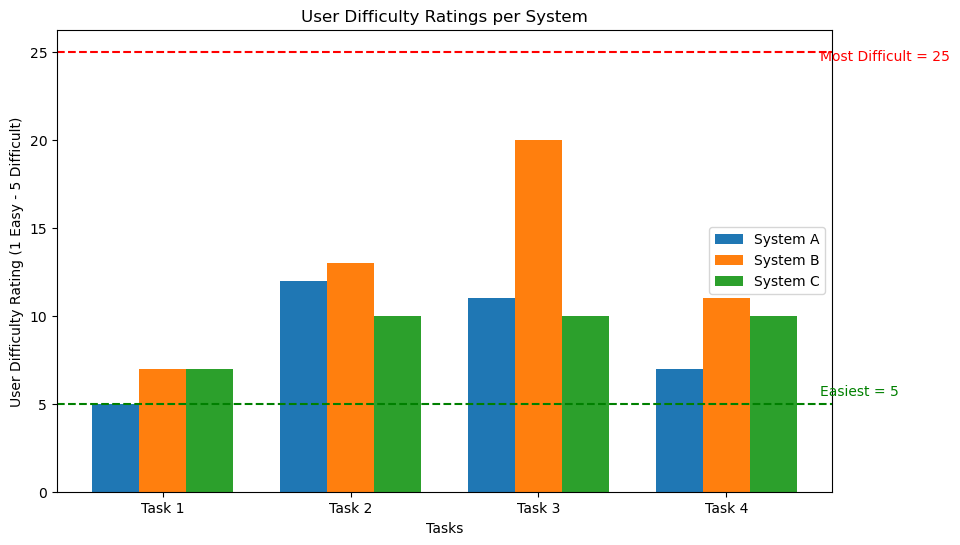

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
for i, system in enumerate(systems):
    ax.bar(x + (i - 1) * width, [user_ratings[j][i] for j in range(len(tasks))], width, label=system)

ax.axhline(y=5, color='green', linestyle='dashed', linewidth=1.5)
ax.text(len(tasks) - 0.5, 5.5, 'Easiest = 5', color='green')
ax.axhline(y=25, color='red', linestyle='dashed', linewidth=1.5)
ax.text(len(tasks) - 0.5, 24.5, 'Most Difficult = 25', color='red')

ax.set_xlabel("Tasks")
ax.set_ylabel("User Difficulty Rating (1 Easy - 5 Difficult)")
ax.set_title("User Difficulty Ratings per System")
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend()
plt.show()

# Preference: Systems

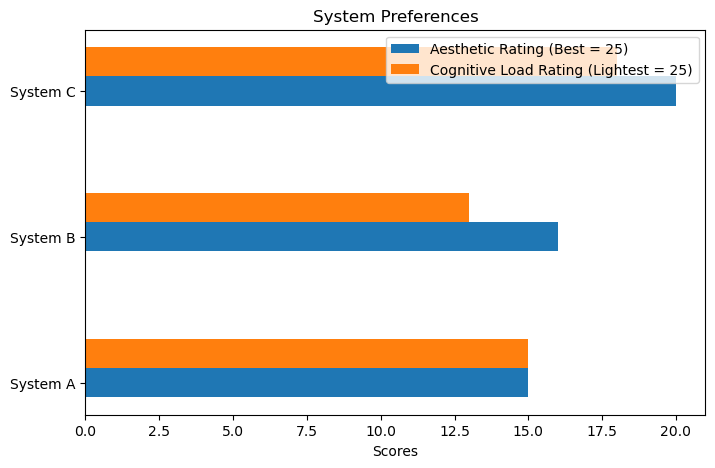

In [7]:
y = np.arange(len(systems))
fig, ax = plt.subplots(figsize=(8, 5))
# ax.barh(y - 0.2, task_pref_count, 0.2, label="Task Preference Count")
ax.barh(y, system_preferences[1], 0.2, label="Aesthetic Rating (Best = 25)")
ax.barh(y + 0.2, system_preferences[2], 0.2, label="Cognitive Load Rating (Lightest = 25)")

ax.set_xlabel("Scores")
ax.set_yticks(y)
ax.set_yticklabels(systems)
ax.set_title("System Preferences")
ax.legend()
plt.show()